In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
pwd

'/content'

In [3]:
# import the data into a pandas data frame
bdf = pd.read_csv('/content/data.csv')

In [4]:
bdf.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Check for null numbers

bdf.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Drop last empty column

bdf = bdf.drop(columns=['Unnamed: 32','id'])

In [8]:
bdf.shape

(569, 31)

In [9]:
# Check the count of the predictors

bdf['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# Convert the predictors into numbers

bdf['diagnosis'].replace(to_replace={'M': 1, "B": 0}, inplace=True)

In [11]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
bdf['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Exploratory Data Analysis

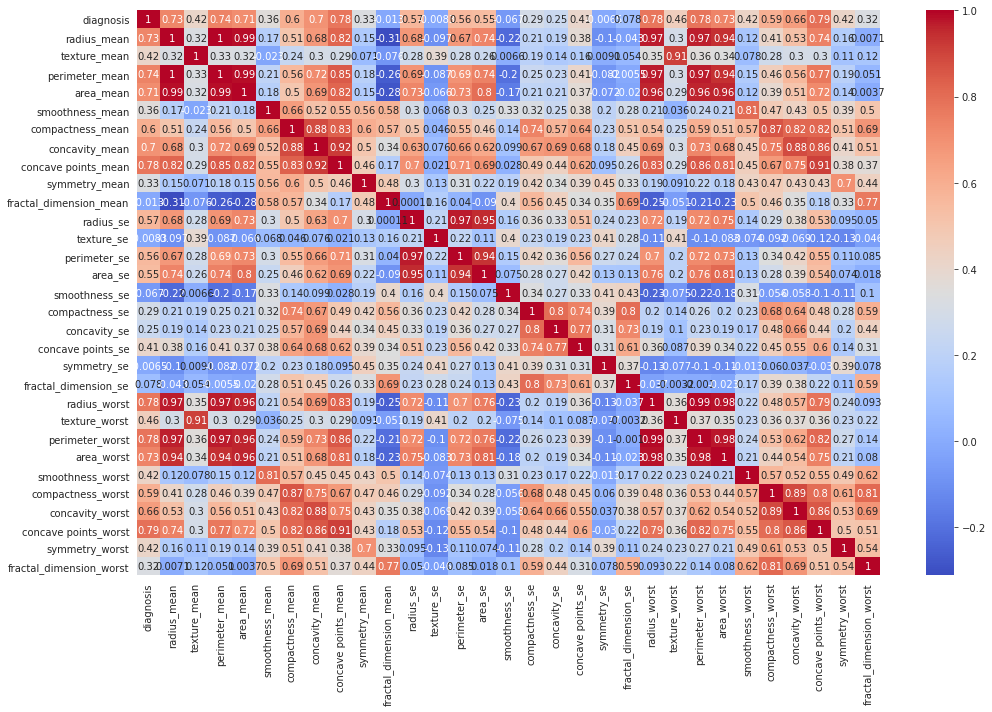

In [13]:
# The number of columns are obviosly a lot
# we might need to perform some feature selection and extraction
# but first, a heatmap

plt.figure(figsize=(15,10))
sns.heatmap(bdf.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

In [14]:
bdf.corr()['diagnosis']

diagnosis                  1.000000
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

### From the heatmap above,  we can see that out of the 32 attributes, only 15 showed strong correlations, this means that we have a lot of noise.

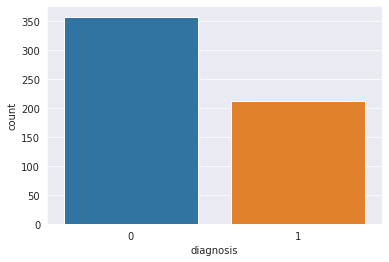

In [15]:
# Visualizing a countplot of our dataset predictor values
sns.countplot(x='diagnosis', data=bdf)

In [16]:
pd.DataFrame({'mean': bdf.mean(), "variance": bdf.var()}, index=bdf.columns)

,mean,variance
diagnosis,0.372583,0.234177
radius_mean,14.127292,12.418920
texture_mean,19.289649,18.498909
perimeter_mean,91.969033,590.440480
area_mean,654.889104,123843.554318
smoothness_mean,0.096360,0.000198
compactness_mean,0.104341,0.002789
concavity_mean,0.088799,0.006355
concave points_mean,0.048919,0.001506
symmetry_mean,0.181162,0.000752


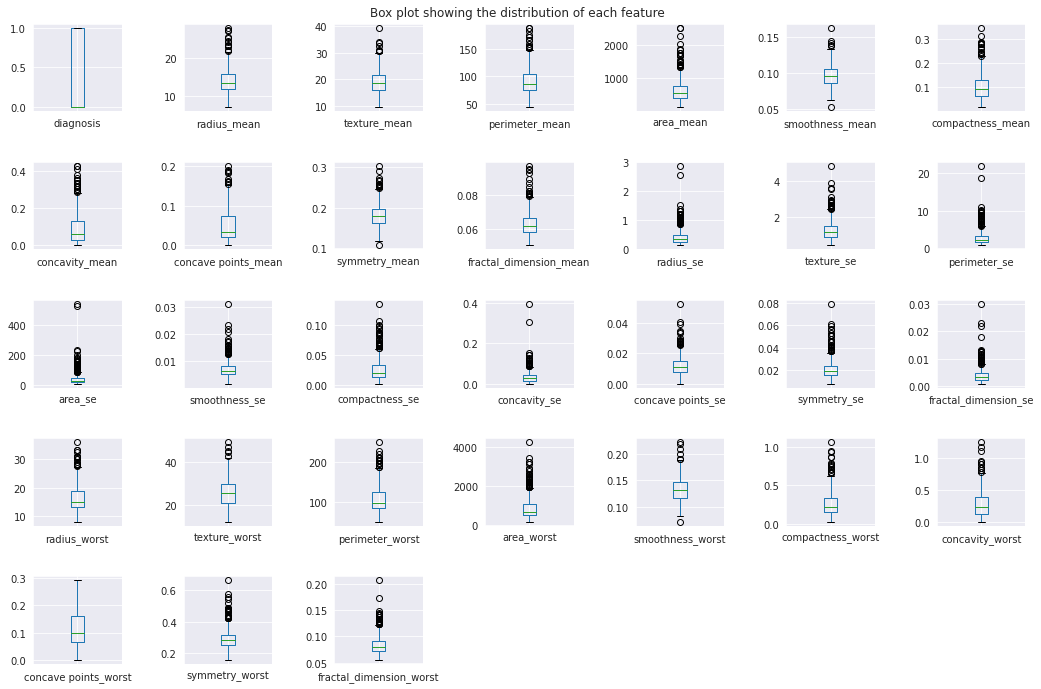

In [17]:
bdf.plot(kind='box',
         subplots=True,
         layout=(5, 7),
         title="Box plot showing the distribution of each feature",
         sharex=False,
         sharey=False,
         figsize=(15, 10))
plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)

In [18]:
bdf.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
5%,0.000000,9.529200,13.088000,60.496000,275.780000,0.075042,0.040660,0.004983,0.005621,0.141500,0.053926,0.160100,0.540140,1.132800,11.360000,0.003690,0.007892,0.003253,0.003831,0.011758,0.001522,10.534000,16.574000,67.856000,331.060000,0.095734,0.071196,0.018360,0.024286,0.212700,0.062558
10%,0.000000,10.260000,14.078000,65.830000,321.600000,0.079654,0.049700,0.013686,0.011158,0.149580,0.055338,0.183080,0.640400,1.280200,13.160000,0.004224,0.009169,0.007726,0.005493,0.013012,0.001710,11.234000,17.800000,72.178000,384.720000,0.102960,0.093676,0.045652,0.038460,0.226120,0.065792
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
90%,1.000000,19.530000,24.992000,129.100000,1177.400000,0.114820,0.175460,0.203040,0.100420,0.214940,0.072266,0.748880,1.909400,5.123200,91.314000,0.010410,0.047602,0.058520,0.018688,0.030120,0.006185,23.682000,33.646000,157.740000,1673.000000,0.161480,0.447840,0.571320,0.208940,0.360080,0.106320


In [19]:
bdf.std()

diagnosis                    0.483918
radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_

## Feature Engineering

In [20]:
# there is a relationship between the radius, the perimeter and the area
# we would calculate the volume as a new column using our understanding from these relationships
import math

a = (bdf['radius_mean'] * 2) * (bdf['radius_mean'] * 2) * (
    (bdf['perimeter_mean'] - (bdf['radius_mean'] * 2)) / 2) * (math.pi / 6)
b = (bdf['radius_se'] * 2) * (bdf['radius_se'] * 2) * (
    (bdf['perimeter_se'] - (bdf['radius_se'] * 2)) / 2) * (math.pi / 6)
c = (bdf['radius_worst'] * 2) * (bdf['radius_worst'] * 2) * (
    (bdf['perimeter_worst'] - (bdf['radius_worst'] * 2)) / 2) * (math.pi / 6)

bdf2 = pd.DataFrame({'volume_mean': a, 'volume_se': b, 'volume_worst': c})
bdfnew = pd.concat([bdf, bdf2], axis=1)
bdfnew

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,volume_mean,volume_se,volume_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,29424.610735,8.034687,90281.295302
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,40658.430154,0.714871,71165.556828
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,36791.213120,1.801079,61294.787673
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,7475.936758,0.631147,16074.874382
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,40748.950233,2.355779,56991.095527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,48132.075443,7.706133,78136.988763
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,38589.674701,2.253314,63248.717998
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,21671.288366,0.547992,33476.531815
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,43950.047654,2.384436,92361.082015


# This shows that we have a binary classification problem with an imbalanced dataset

In [21]:
# Seeing that we have a huge number of columns we can't properly visualize the relationship of our dataset
# we would need to take care of the noise and also the imbalance in the data
# We also have outliers in our data
# we could apply simplicity to visualise the data by reducing it to 2 pca component

# Principal component analyis

### first we would compress the dataset using pca analysis

In [22]:
# separating the data into X and Y variables
X = bdf.drop('diagnosis', axis=1)
y = bdf['diagnosis']

print(X.shape, y.shape)

(569, 30) (569,)


In [23]:
X, y

(     radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
 0          17.99         10.38  ...          0.4601                  0.11890
 1          20.57         17.77  ...          0.2750                  0.08902
 2          19.69         21.25  ...          0.3613                  0.08758
 3          11.42         20.38  ...          0.6638                  0.17300
 4          20.29         14.34  ...          0.2364                  0.07678
 ..           ...           ...  ...             ...                      ...
 564        21.56         22.39  ...          0.2060                  0.07115
 565        20.13         28.25  ...          0.2572                  0.06637
 566        16.60         28.08  ...          0.2218                  0.07820
 567        20.60         29.33  ...          0.4087                  0.12400
 568         7.76         24.54  ...          0.2871                  0.07039
 
 [569 rows x 30 columns], 0      1
 1      1
 2      1
 3     

In [24]:
# running X through a variance selector

#from sklearn.feature_selection import VarianceThreshold
#selector = VarianceThreshold()


In [25]:
# importing the needed modules
# ssince our data contains outliers we need to use either robust_scale and RobustScaler instead of StandardScaler
# passing our X predictors through our pipeline
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = scale.fit_transform(X)
X.shape

(569, 30)

# Building our model

# Spliting the model into test and train data

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [27]:
len(X)

569

In [28]:
from sklearn.decomposition import PCA

In [29]:
!pip3 install catboost

     |████████████████████████████████| 66.2MB 63kB/s 


# Using catboost classifier

In [30]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_seed=10,  verbose=10)

cat_model.fit(X_train, y_train)

Learning rate set to 0.00736
0:	learn: 0.6818212	total: 58.6ms	remaining: 58.5s
10:	learn: 0.5782492	total: 141ms	remaining: 12.7s
20:	learn: 0.4914145	total: 228ms	remaining: 10.6s
30:	learn: 0.4202416	total: 311ms	remaining: 9.72s
40:	learn: 0.3654208	total: 392ms	remaining: 9.17s
50:	learn: 0.3192717	total: 482ms	remaining: 8.97s
60:	learn: 0.2818690	total: 566ms	remaining: 8.72s
70:	learn: 0.2522496	total: 647ms	remaining: 8.47s
80:	learn: 0.2264843	total: 734ms	remaining: 8.32s
90:	learn: 0.2034797	total: 829ms	remaining: 8.28s
100:	learn: 0.1848078	total: 910ms	remaining: 8.1s
110:	learn: 0.1686761	total: 996ms	remaining: 7.97s
120:	learn: 0.1548403	total: 1.08s	remaining: 7.83s
130:	learn: 0.1424687	total: 1.16s	remaining: 7.7s
140:	learn: 0.1316209	total: 1.25s	remaining: 7.6s
150:	learn: 0.1222981	total: 1.33s	remaining: 7.47s
160:	learn: 0.1137481	total: 1.41s	remaining: 7.34s
170:	learn: 0.1057997	total: 1.5s	remaining: 7.27s
180:	learn: 0.0989940	total: 1.58s	remaining: 7.1

In [31]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

pred = cat_model.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[72  0]
 [ 4 38]]


# We Achieved a 96 percent accuracy and unfortunately we got 4 false positives

In [32]:
len(X_train)

455

In [33]:
len(X_test)

114

# using a neural network

In [34]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras.models import Sequential


# Setting random seed for reproducible results

from tensorflow.python.client import device_lib 

np.random.seed(42)
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18188821574755441725
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 963254465009420594
physical_device_desc: "device: XLA_CPU device"
]


In [35]:
nn = Sequential()
nn.add(Dense(16, activation='relu', input_dim=30))
#nn.add(Dropout(0.1))

nn.add(Dense(9, activation='relu'))
#nn.add(Dropout(0.1))

nn.add(Dense(7, activation='relu'))
#nn.add(Dropout(0.1))


nn.add(Dense(1, activation='sigmoid'))


nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 153       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 70        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 727
Trainable params: 727
Non-trainable params: 0
_________________________________________________________________


In [36]:
nn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [37]:
mc = [tf.keras.callbacks.ModelCheckpoint('cifar10.h5', save_best_only=True, mode='min')]
nn.fit(X_train, y_train, epochs=7, batch_size=1, callbacks=mc)

Epoch 1/7
455/455 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.9341
Epoch 2/7
455/455 [==============================] - 0s 957us/step - loss: 0.1256 - accuracy: 0.9626
Epoch 3/7
455/455 [==============================] - 0s 987us/step - loss: 0.1062 - accuracy: 0.9692
Epoch 4/7
455/455 [==============================] - 0s 971us/step - loss: 0.0914 - accuracy: 0.9736
Epoch 5/7
455/455 [==============================] - 0s 980us/step - loss: 0.0887 - accuracy: 0.9780
Epoch 6/7
455/455 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9824
Epoch 7/7
455/455 [==============================] - 0s 979us/step - loss: 0.0907 - accuracy: 0.9802


In [38]:
pred2 = nn.predict(X_test)
pred2 = [1 if x>= 0.5 else 0 for x in pred2]

print(classification_report(y_test, pred2))
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[72  0]
 [ 2 40]]
